# Sleep health and lifestyle

## Importando a base

In [2]:
import pandas as pd

health = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', sep=',')
health.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75        10000           None  
2         125/80          75        10000           None  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

## Descritiva

In [3]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
health.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

In [6]:
health.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [8]:
import pandas_profiling 

pandas_profiling.ProfileReport(health)

C:\Windows\Temp\ipykernel_13268\832910289.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling
Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


## Transformando a base

In [7]:
health.Occupation.unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [45]:
Ciências_da_Saúde  = pd.DataFrame(['Doctor', 'Nurse'], columns= ['Occupation'])
Ciências_da_Saúde['ocupacao_grupo'] = ['Ciências_da_Saúde','Ciências_da_Saúde']
Ciências_Exatas_e_da_Terra = pd.DataFrame(['Scientist'], columns= ['Occupation'])
Ciências_Exatas_e_da_Terra['ocupacao_grupo'] = ['Ciências_Exatas_e_da_Terra']
Engenharias = pd.DataFrame(['Software Engineer','Engineer'], columns= ['Occupation'])
Engenharias['ocupacao_grupo'] = ['Engenharias','Engenharias']
Ciências_Sociais_Aplicadas = pd.DataFrame(['Lawyer','Accountant'], columns= ['Occupation'])
Ciências_Sociais_Aplicadas['ocupacao_grupo'] = ['Ciências_Sociais_Aplicadas','Ciências_Sociais_Aplicadas']
Outras_profissões =  pd.DataFrame(['Sales Representative', 'Manager', 'Salesperson', 'Teacher'], columns= ['Occupation'])
Outras_profissões['ocupacao_grupo'] = ['Outras_profissões','Outras_profissões','Outras_profissões','Outras_profissões']

ocupacoes = pd.concat([Ciências_da_Saúde,Ciências_Exatas_e_da_Terra,Engenharias,Ciências_Sociais_Aplicadas,Outras_profissões], ignore_index= True)
ocupacoes

Occupation              ocupacao_grupo
0                 Doctor           Ciências_da_Saúde
1                  Nurse           Ciências_da_Saúde
2              Scientist  Ciências_Exatas_e_da_Terra
3      Software Engineer                 Engenharias
4               Engineer                 Engenharias
5                 Lawyer  Ciências_Sociais_Aplicadas
6             Accountant  Ciências_Sociais_Aplicadas
7   Sales Representative           Outras_profissões
8                Manager           Outras_profissões
9            Salesperson           Outras_profissões
10               Teacher           Outras_profissões

###### Referência dos grupos de trabalho: https://www.guiadacarreira.com.br/blog/tipos-de-profissoes

In [46]:
health_transformado = health.copy()
health_transformado = pd.merge(health_transformado,ocupacoes, how= 'left', on='Occupation' )
health_transformado

Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood Pressure  Heart Rate  Daily Steps Sleep Disorder     ocupacao_grupo  
0           126/83          77         4200           None        Engenharias  
1           125/80          75        10000           None  Ciências_da_Saúde  
2           125/80          75        10000           None  Ciências_da_Saúde  
3           140/90          85         3000    Sleep Apnea  Outras_profissões  
4           140/90          85         3000    Sleep Apnea  Outras_profissões  
..             ...         ...          ...            ...                ...  
369         140/95          68         7000    Sleep Apnea  Ciências_da_Saúde  
370         140/95          68         7000    Sleep Apnea  Ciências_da_Saúde  
371         140/95          68         7000    Sleep Apnea  Ciências_da_Saúde  
372         140/95          68         7000    Sleep Apnea  Ciências_da_Saúde  
373         140/95          68         7000    Sleep Apnea  Ciências_da_Saúde  

[374 rows x 14 columns]

In [47]:
health_transformado.drop(columns=['Occupation'], inplace= True)
health_transformado

Person ID  Gender  Age  Sleep Duration  Quality of Sleep  \
0            1    Male   27             6.1                 6   
1            2    Male   28             6.2                 6   
2            3    Male   28             6.2                 6   
3            4    Male   28             5.9                 4   
4            5    Male   28             5.9                 4   
..         ...     ...  ...             ...               ...   
369        370  Female   59             8.1                 9   
370        371  Female   59             8.0                 9   
371        372  Female   59             8.1                 9   
372        373  Female   59             8.1                 9   
373        374  Female   59             8.1                 9   

     Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                         42             6   Overweight         126/83   
1                         60             8       Normal         125/80   
2                         60             8       Normal         125/80   
3                         30             8        Obese         140/90   
4                         30             8        Obese         140/90   
..                       ...           ...          ...            ...   
369                       75             3   Overweight         140/95   
370                       75             3   Overweight         140/95   
371                       75             3   Overweight         140/95   
372                       75             3   Overweight         140/95   
373                       75             3   Overweight         140/95   

     Heart Rate  Daily Steps Sleep Disorder     ocupacao_grupo  
0            77         4200           None        Engenharias  
1            75        10000           None  Ciências_da_Saúde  
2            75        10000           None  Ciências_da_Saúde  
3            85         3000    Sleep Apnea  Outras_profissões  
4            85         3000    Sleep Apnea  Outras_profissões  
..          ...          ...            ...                ...  
369          68         7000    Sleep Apnea  Ciências_da_Saúde  
370          68         7000    Sleep Apnea  Ciências_da_Saúde  
371          68         7000    Sleep Apnea  Ciências_da_Saúde  
372          68         7000    Sleep Apnea  Ciências_da_Saúde  
373          68         7000    Sleep Apnea  Ciências_da_Saúde  

[374 rows x 13 columns]

In [54]:
health_transformado['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [55]:
health_transformado['PAS'],health_transformado['PAD'] = health_transformado['Blood Pressure'].str.split('/',1).str
health_transformado

C:\Windows\Temp\ipykernel_13268\4099809750.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  health_transformado['PAS'],health_transformado['PAD'] = health_transformado['Blood Pressure'].str.split('/',1).str
C:\Windows\Temp\ipykernel_13268\4099809750.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  health_transformado['PAS'],health_transformado['PAD'] = health_transformado['Blood Pressure'].str.split('/',1).str


Person ID  Gender  Age  Sleep Duration  Quality of Sleep  \
0            1    Male   27             6.1                 6   
1            2    Male   28             6.2                 6   
2            3    Male   28             6.2                 6   
3            4    Male   28             5.9                 4   
4            5    Male   28             5.9                 4   
..         ...     ...  ...             ...               ...   
369        370  Female   59             8.1                 9   
370        371  Female   59             8.0                 9   
371        372  Female   59             8.1                 9   
372        373  Female   59             8.1                 9   
373        374  Female   59             8.1                 9   

     Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                         42             6   Overweight         126/83   
1                         60             8       Normal         125/80   
2                         60             8       Normal         125/80   
3                         30             8        Obese         140/90   
4                         30             8        Obese         140/90   
..                       ...           ...          ...            ...   
369                       75             3   Overweight         140/95   
370                       75             3   Overweight         140/95   
371                       75             3   Overweight         140/95   
372                       75             3   Overweight         140/95   
373                       75             3   Overweight         140/95   

     Heart Rate  Daily Steps Sleep Disorder     ocupacao_grupo  PAS PAD  
0            77         4200           None        Engenharias  126  83  
1            75        10000           None  Ciências_da_Saúde  125  80  
2            75        10000           None  Ciências_da_Saúde  125  80  
3            85         3000    Sleep Apnea  Outras_profissões  140  90  
4            85         3000    Sleep Apnea  Outras_profissões  140  90  
..          ...          ...            ...                ...  ...  ..  
369          68         7000    Sleep Apnea  Ciências_da_Saúde  140  95  
370          68         7000    Sleep Apnea  Ciências_da_Saúde  140  95  
371          68         7000    Sleep Apnea  Ciências_da_Saúde  140  95  
372          68         7000    Sleep Apnea  Ciências_da_Saúde  140  95  
373          68         7000    Sleep Apnea  Ciências_da_Saúde  140  95  

[374 rows x 15 columns]

In [57]:
health_transformado.drop('Blood Pressure', axis=1, inplace= True)
health_transformado

Person ID  Gender  Age  Sleep Duration  Quality of Sleep  \
0            1    Male   27             6.1                 6   
1            2    Male   28             6.2                 6   
2            3    Male   28             6.2                 6   
3            4    Male   28             5.9                 4   
4            5    Male   28             5.9                 4   
..         ...     ...  ...             ...               ...   
369        370  Female   59             8.1                 9   
370        371  Female   59             8.0                 9   
371        372  Female   59             8.1                 9   
372        373  Female   59             8.1                 9   
373        374  Female   59             8.1                 9   

     Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                         42             6   Overweight          77   
1                         60             8       Normal          75   
2                         60             8       Normal          75   
3                         30             8        Obese          85   
4                         30             8        Obese          85   
..                       ...           ...          ...         ...   
369                       75             3   Overweight          68   
370                       75             3   Overweight          68   
371                       75             3   Overweight          68   
372                       75             3   Overweight          68   
373                       75             3   Overweight          68   

     Daily Steps Sleep Disorder     ocupacao_grupo  PAS PAD  
0           4200           None        Engenharias  126  83  
1          10000           None  Ciências_da_Saúde  125  80  
2          10000           None  Ciências_da_Saúde  125  80  
3           3000    Sleep Apnea  Outras_profissões  140  90  
4           3000    Sleep Apnea  Outras_profissões  140  90  
..           ...            ...                ...  ...  ..  
369         7000    Sleep Apnea  Ciências_da_Saúde  140  95  
370         7000    Sleep Apnea  Ciências_da_Saúde  140  95  
371         7000    Sleep Apnea  Ciências_da_Saúde  140  95  
372         7000    Sleep Apnea  Ciências_da_Saúde  140  95  
373         7000    Sleep Apnea  Ciências_da_Saúde  140  95  

[374 rows x 14 columns]

In [67]:
health_transformado = health_transformado.astype({'PAS':'int64', 'PAD':'int64'})

In [69]:
health_transformado['PAM'] = (health_transformado['PAS'] + 2 * health_transformado['PAD'])/3
health_transformado

Person ID  Gender  Age  Sleep Duration  Quality of Sleep  \
0            1    Male   27             6.1                 6   
1            2    Male   28             6.2                 6   
2            3    Male   28             6.2                 6   
3            4    Male   28             5.9                 4   
4            5    Male   28             5.9                 4   
..         ...     ...  ...             ...               ...   
369        370  Female   59             8.1                 9   
370        371  Female   59             8.0                 9   
371        372  Female   59             8.1                 9   
372        373  Female   59             8.1                 9   
373        374  Female   59             8.1                 9   

     Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                         42             6   Overweight          77   
1                         60             8       Normal          75   
2                         60             8       Normal          75   
3                         30             8        Obese          85   
4                         30             8        Obese          85   
..                       ...           ...          ...         ...   
369                       75             3   Overweight          68   
370                       75             3   Overweight          68   
371                       75             3   Overweight          68   
372                       75             3   Overweight          68   
373                       75             3   Overweight          68   

     Daily Steps Sleep Disorder     ocupacao_grupo  PAS  PAD         PAM  
0           4200           None        Engenharias  126   83   97.333333  
1          10000           None  Ciências_da_Saúde  125   80   95.000000  
2          10000           None  Ciências_da_Saúde  125   80   95.000000  
3           3000    Sleep Apnea  Outras_profissões  140   90  106.666667  
4           3000    Sleep Apnea  Outras_profissões  140   90  106.666667  
..           ...            ...                ...  ...  ...         ...  
369         7000    Sleep Apnea  Ciências_da_Saúde  140   95  110.000000  
370         7000    Sleep Apnea  Ciências_da_Saúde  140   95  110.000000  
371         7000    Sleep Apnea  Ciências_da_Saúde  140   95  110.000000  
372         7000    Sleep Apnea  Ciências_da_Saúde  140   95  110.000000  
373         7000    Sleep Apnea  Ciências_da_Saúde  140   95  110.000000  

[374 rows x 15 columns]

In [71]:
health_transformado = pd.get_dummies(data= health_transformado, columns=['Gender','BMI Category','ocupacao_grupo'], drop_first = True)
health_transformado.head()

Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0          1   27             6.1                 6                       42   
1          2   28             6.2                 6                       60   
2          3   28             6.2                 6                       60   
3          4   28             5.9                 4                       30   
4          5   28             5.9                 4                       30   

   Stress Level  Heart Rate  Daily Steps Sleep Disorder  PAS  PAD         PAM  \
0             6          77         4200           None  126   83   97.333333   
1             8          75        10000           None  125   80   95.000000   
2             8          75        10000           None  125   80   95.000000   
3             8          85         3000    Sleep Apnea  140   90  106.666667   
4             8          85         3000    Sleep Apnea  140   90  106.666667   

   Gender_Male  BMI Category_Normal Weight  BMI Category_Obese  \
0            1                           0                   0   
1            1                           0                   0   
2            1                           0                   0   
3            1                           0                   1   
4            1                           0                   1   

   BMI Category_Overweight  ocupacao_grupo_Ciências_Sociais_Aplicadas  \
0                        1                                          0   
1                        0                                          0   
2                        0                                          0   
3                        0                                          0   
4                        0                                          0   

   ocupacao_grupo_Ciências_da_Saúde  ocupacao_grupo_Engenharias  \
0                                 0                           1   
1                                 1                           0   
2                                 1                           0   
3                                 0                           0   
4                                 0                           0   

   ocupacao_grupo_Outras_profissões  
0                                 0  
1                                 0  
2                                 0  
3                                 1  
4                                 1

In [72]:
health_transformado.drop(columns = ['PAS','PAD'], inplace = True)
health_transformado

Person ID  Age  Sleep Duration  Quality of Sleep  \
0            1   27             6.1                 6   
1            2   28             6.2                 6   
2            3   28             6.2                 6   
3            4   28             5.9                 4   
4            5   28             5.9                 4   
..         ...  ...             ...               ...   
369        370   59             8.1                 9   
370        371   59             8.0                 9   
371        372   59             8.1                 9   
372        373   59             8.1                 9   
373        374   59             8.1                 9   

     Physical Activity Level  Stress Level  Heart Rate  Daily Steps  \
0                         42             6          77         4200   
1                         60             8          75        10000   
2                         60             8          75        10000   
3                         30             8          85         3000   
4                         30             8          85         3000   
..                       ...           ...         ...          ...   
369                       75             3          68         7000   
370                       75             3          68         7000   
371                       75             3          68         7000   
372                       75             3          68         7000   
373                       75             3          68         7000   

    Sleep Disorder         PAM  Gender_Male  BMI Category_Normal Weight  \
0             None   97.333333            1                           0   
1             None   95.000000            1                           0   
2             None   95.000000            1                           0   
3      Sleep Apnea  106.666667            1                           0   
4      Sleep Apnea  106.666667            1                           0   
..             ...         ...          ...                         ...   
369    Sleep Apnea  110.000000            0                           0   
370    Sleep Apnea  110.000000            0                           0   
371    Sleep Apnea  110.000000            0                           0   
372    Sleep Apnea  110.000000            0                           0   
373    Sleep Apnea  110.000000            0                           0   

     BMI Category_Obese  BMI Category_Overweight  \
0                     0                        1   
1                     0                        0   
2                     0                        0   
3                     1                        0   
4                     1                        0   
..                  ...                      ...   
369                   0                        1   
370                   0                        1   
371                   0                        1   
372                   0                        1   
373                   0                        1   

     ocupacao_grupo_Ciências_Sociais_Aplicadas  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
..                                         ...   
369                                          0   
370                                          0   
371                                          0   
372                                          0   
373                                          0   

     ocupacao_grupo_Ciências_da_Saúde  ocupacao_grupo_Engenharias  \
0                                   0                           1   
1                                   1                           0   
2                                   1                           0   
3                                   0                           

In [110]:
#Tabela de frequências absolutas da variável 'atrasado' com labels
health_transformado_multinomial = health_transformado.copy()

health_transformado_multinomial['Sleep Disorder'].value_counts(sort=False)

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [111]:
#Criando uma variável 'atrasado2' a partir da variável 'atrasado',
#com labels iguais a 0, 1 e 2 e com tipo 'int' (poderia também ser do tipo
#'float'), a fim de que seja possível estimar o modelo por meio
#da função 'MNLogit'
health_transformado_multinomial.loc[health_transformado_multinomial['Sleep Disorder']==
                            'None',
                            'Distúrbio do sono'] = 0 #categoria de referência
health_transformado_multinomial.loc[health_transformado_multinomial['Sleep Disorder']==
                            'Sleep Apnea',
                            'Distúrbio do sono'] = 1
health_transformado_multinomial.loc[health_transformado_multinomial['Sleep Disorder']==
                            'Insomnia',
                            'Distúrbio do sono'] = 2

health_transformado_multinomial['Distúrbio do sono'] =\
    health_transformado_multinomial['Distúrbio do sono'].astype('int64')

## Regressão Multinomial

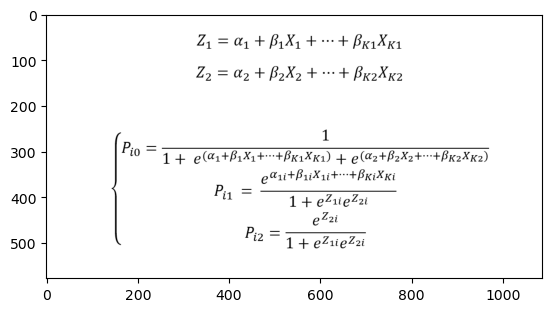

In [129]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread('modelo.jpg')
plt.imshow(image)
plt.show()

In [105]:
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from scipy import stats # estatística chi2
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
import plotly.graph_objs as go # gráfico 3D
import statsmodels.formula.api as smf # estimação do modelo logístico binário
from statsmodels.discrete.discrete_model import MNLogit

In [112]:
x = health_transformado_multinomial.drop(columns=['Distúrbio do sono','Sleep Disorder'])
y = health_transformado_multinomial['Distúrbio do sono']

#Esse pacote precisa que a constante seja definida pelo usuário
X = sm.add_constant(x)

#Estimação do modelo - função 'MNLogit' do pacote
#'statsmodels.discrete.discrete_model'
modelo_health = MNLogit(endog=y, exog=X).fit()

#Parâmetros do modelo
modelo_health.summary()

         Current function value: 0.295422
         Iterations: 35


c:\Users\bruno.silva\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:      Distúrbio do sono   No. Observations:                  374
Model:                        MNLogit   Df Residuals:                      338
Method:                           MLE   Df Model:                           34
Date:                Sun, 11 Jun 2023   Pseudo R-squ.:                  0.6941
Time:                        09:59:27   Log-Likelihood:                -110.49
converged:                      False   LL-Null:                       -361.17
Covariance Type:            nonrobust   LLR p-value:                 1.677e-84
=============================================================================================================
                      Distúrbio do sono=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                      -153.6779     37.237     -4.127      0.000    -226.662     -80.694
Person ID                                    -0.0343      0.028     -1.209      0.226      -0.090       0.021
Age                                           0.3180      0.389      0.817      0.414      -0.445       1.081
Sleep Duration                                3.5419      1.394      2.541      0.011       0.810       6.274
Quality of Sleep                             -0.8592      1.370     -0.627      0.530      -3.543       1.825
Physical Activity Level                      -0.0785      0.040     -1.941      0.052      -0.158       0.001
Stress Level                                 -0.0649      0.874     -0.074      0.941      -1.777       1.647
Heart Rate                                    0.7829      0.252      3.101      0.002       0.288       1.278
Daily Steps                                   0.0007      0.001      1.317      0.188      -0.000       0.002
PAM                                           0.7178      0.214      3.352      0.001       0.298       1.138
Gender_Male                                  -3.2289      1.406     -2.296      0.022      -5.985      -0.473
BMI Category_Normal Weight                   -9.0103      4.437     -2.031      0.042     -17.706      -0.315
BMI Category_Obese                           16.6597   5.93e+05   2.81e-05      1.000   -1.16e+06    1.16e+06
BMI Category_Overweight                      -4.8781      2.874     -1.697      0.090     -10.511       0.755
ocupacao_grupo_Ciências_Sociais_Aplicadas     1.4285      3.810      0.375      0.708      -6.039       8.896
ocupacao_grupo_Ciências_da_Saúde              2.2649      3.398      0.667      0.505      -4.395       8.925
ocupacao_grupo_Engenharias                    1.3903      3.890      0.357      0.721      -6.235       9.015
ocupacao_grupo_Outras_profissões              7.7246      3.479      2.220      0.026       0.905      14.544
-------------------------------------------------------------------------------------------------------------
                      Distúrbio do sono=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                       -79.7444   5449.656     -0.015      0.988   -1.08e+04    1.06e+04
Person ID                                    -0.0679      0.025     -2.662      0.008      -0.118      -0.018
Age                                           1.2010      0.385      3.122      0.002       0.447       1.955
Sleep Duration                               -4.6590      1.851     -2.517      0.012      -8.286      -1.032
Quality of Sleep                             -0.0950      1.304     -0.073      0.942      -2.651       2.461
Physical Activity Level                       0.052

In [113]:
# In[ ]: Vamos definir uma função 'Qui2' para se extrair a estatística geral
# do modelo

def Qui2(modelo_multinomial):
    maximo = modelo_multinomial.llf
    minimo = modelo_multinomial.llnull
    qui2 = -2*(minimo - maximo)
    pvalue = stats.distributions.chi2.sf(qui2,1)
    df = pd.DataFrame({'Qui quadrado':[qui2],
                       'pvalue':[pvalue]})
    return df

In [114]:
Qui2(modelo_health)

Qui quadrado         pvalue
0    501.361622  4.805179e-111

In [115]:
# In[ ]: Adicionando as probabilidades de ocorrência de cada uma das
#categorias de Y definidas pela modelagem, bem como a respectiva
#classificação, ao dataframe original

#Probabilidades de ocorrência das três categoriais
#Definição do array 'phats':
phats = modelo_health.predict()
phats

#Transformação do array 'phats' para o dataframe 'phats':
phats = pd.DataFrame(phats)
phats

#Concatenando o dataframe original com o dataframe 'phats':
health_transformado_multinomial = pd.concat([health_transformado_multinomial, phats], axis=1)
health_transformado_multinomial

# Analisando o resultado de acordo com a categoria de resposta:
predicao = phats.idxmax(axis=1)
predicao

#Adicionando a categoria de resposta 'predicao' ao dataframe original,
#por meio da criação da variável 'predicao'
health_transformado_multinomial['predicao'] = predicao
health_transformado_multinomial

#Criando a variável 'predicao_label' a partir da variável 'predicao',
#respeitando os seguintes rótulos:
# 0: não chegou atrasado
# 1: chegou atrasado primeira aula
# 2: chegou atrasado segunda aula

health_transformado_multinomial.loc[health_transformado_multinomial['predicao']==0,
                            'predicao_label'] ='None'
health_transformado_multinomial.loc[health_transformado_multinomial['predicao']==1,
                            'predicao_label'] ='Sleep Apnea'
health_transformado_multinomial.loc[health_transformado_multinomial['predicao']==2,
                            'predicao_label'] ='Insomnia'

health_transformado_multinomial

Person ID  Age  Sleep Duration  Quality of Sleep  \
0            1   27             6.1                 6   
1            2   28             6.2                 6   
2            3   28             6.2                 6   
3            4   28             5.9                 4   
4            5   28             5.9                 4   
..         ...  ...             ...               ...   
369        370   59             8.1                 9   
370        371   59             8.0                 9   
371        372   59             8.1                 9   
372        373   59             8.1                 9   
373        374   59             8.1                 9   

     Physical Activity Level  Stress Level  Heart Rate  Daily Steps  \
0                         42             6          77         4200   
1                         60             8          75        10000   
2                         60             8          75        10000   
3                         30             8          85         3000   
4                         30             8          85         3000   
..                       ...           ...         ...          ...   
369                       75             3          68         7000   
370                       75             3          68         7000   
371                       75             3          68         7000   
372                       75             3          68         7000   
373                       75             3          68         7000   

    Sleep Disorder         PAM  ...  \
0             None   97.333333  ...   
1             None   95.000000  ...   
2             None   95.000000  ...   
3      Sleep Apnea  106.666667  ...   
4      Sleep Apnea  106.666667  ...   
..             ...         ...  ...   
369    Sleep Apnea  110.000000  ...   
370    Sleep Apnea  110.000000  ...   
371    Sleep Apnea  110.000000  ...   
372    Sleep Apnea  110.000000  ...   
373    Sleep Apnea  110.000000  ...   

     ocupacao_grupo_Ciências_Sociais_Aplicadas  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
..                                         ...   
369                                          0   
370                                          0   
371                                          0   
372                                          0   
373                                          0   

     ocupacao_grupo_Ciências_da_Saúde  ocupacao_grupo_Engenharias  \
0                                   0                           1   
1                                   1                           0   
2                                   1                           0   
3                                   0                           0   
4                                   0                           0   
..                                ...                         ...   
369                                 1                           0   
370                                 1                           0   
371                                 1                           0   
372                                 1                           0   
373                                 1                           0   

     ocupacao_grupo_Outras_profissões  Distúrbio do sono             0  \
0                                   0                  0  8.444872e-01   
1                                   0                  0  5.303374e-01   
2                                   0                  0  5.388768e-01   
3                                   1                  1  1.030136e-16   
4                                   1                  1  1.084220e-16   
..                                ...                ...           ...   
369                                 0             

In [121]:
health_transformado_multinomial['Sleep Disorder'].value_counts(sort=False) 

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [122]:
health_transformado_multinomial['predicao_label'].value_counts(sort=False)

None           223
Insomnia        70
Sleep Apnea     81
Name: predicao_label, dtype: int64

In [116]:
# In[ ]: Eficiência global do modelo

#Criando uma tabela para comparar as ocorrências reais com as predições
table = pd.pivot_table(health_transformado_multinomial,
                       index=['predicao_label'],
                       columns=['Sleep Disorder'],
                       aggfunc='size')

#Substituindo 'NaN' por zero
table = table.fillna(0)
table

#Transformando o dataframe 'table' para 'array', para que seja possível
#estabelecer o atributo 'diagonal'
table = table.to_numpy()
table

#Eficiência global do modelo
acuracia = table.diagonal().sum()/table.sum()
acuracia


0.9117647058823529

In [124]:
health_transformado_multinomial.head(20)

Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0           1   27             6.1                 6                       42   
1           2   28             6.2                 6                       60   
2           3   28             6.2                 6                       60   
3           4   28             5.9                 4                       30   
4           5   28             5.9                 4                       30   
5           6   28             5.9                 4                       30   
6           7   29             6.3                 6                       40   
7           8   29             7.8                 7                       75   
8           9   29             7.8                 7                       75   
9          10   29             7.8                 7                       75   
10         11   29             6.1                 6                       30   
11         12   29             7.8                 7                       75   
12         13   29             6.1                 6                       30   
13         14   29             6.0                 6                       30   
14         15   29             6.0                 6                       30   
15         16   29             6.0                 6                       30   
16         17   29             6.5                 5                       40   
17         18   29             6.0                 6                       30   
18         19   29             6.5                 5                       40   
19         20   30             7.6                 7                       75   

    Stress Level  Heart Rate  Daily Steps Sleep Disorder         PAM  ...  \
0              6          77         4200           None   97.333333  ...   
1              8          75        10000           None   95.000000  ...   
2              8          75        10000           None   95.000000  ...   
3              8          85         3000    Sleep Apnea  106.666667  ...   
4              8          85         3000    Sleep Apnea  106.666667  ...   
5              8          85         3000       Insomnia  106.666667  ...   
6              7          82         3500       Insomnia  106.666667  ...   
7              6          70         8000           None   93.333333  ...   
8              6          70         8000           None   93.333333  ...   
9              6          70         8000           None   93.333333  ...   
10             8          70         8000           None   93.333333  ...   
11             6          70         8000           None   93.333333  ...   
12             8          70         8000           None   93.333333  ...   
13             8          70         8000           None   93.333333  ...   
14             8          70         8000           None   93.333333  ...   
15             8          70         8000           None   93.333333  ...   
16             7          80         4000    Sleep Apnea  102.000000  ...   
17             8          70         8000    Sleep Apnea   93.333333  ...   
18             7          80         4000       Insomnia  102.000000  ...   
19             6          70         8000           None   93.333333  ...   

    ocupacao_grupo_Ciências_Sociais_Aplicadas  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
5                                           0   
6                                           0   
7                                           0   
8                                           0   
9                                           0   
10                                          0   
11                                          0   
12                                          0  

c:\Users\bruno.silva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\bruno.silva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\bruno.silva\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


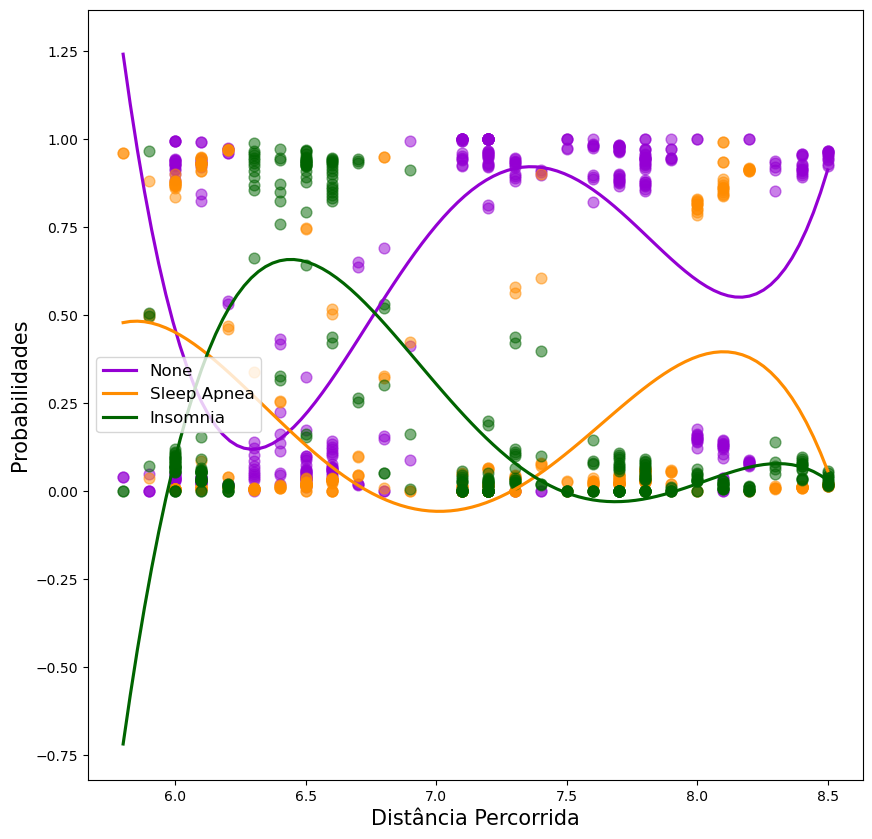

In [119]:
# In[ ]: Plotagens das probabilidades

#Plotagem das smooth probability lines para a variável 'dist'

# 0: não chegou atrasado
# 1: chegou atrasado primeira aula
# 2: chegou atrasado segunda aula

plt.figure(figsize=(10,10))
sns.regplot(health_transformado_multinomial['Sleep Duration'],
            health_transformado_multinomial[0],
            ci=False, label='None', scatter=False,
            order=4, color='darkviolet')
plt.scatter(health_transformado_multinomial['Sleep Duration'],
            health_transformado_multinomial[0], alpha=0.5,
            s=60, color='darkviolet')
sns.regplot(health_transformado_multinomial['Sleep Duration'],
            health_transformado_multinomial[1],
            ci=False, label='Sleep Apnea', scatter=False,
            order=4, color='darkorange')
plt.scatter(health_transformado_multinomial['Sleep Duration'],
            health_transformado_multinomial[1], alpha=0.5,
            s=60, color='darkorange')
sns.regplot(health_transformado_multinomial['Sleep Duration'],
            health_transformado_multinomial[2],
            ci=False, label='Insomnia', scatter=False,
            order=4, color='darkgreen')
plt.scatter(health_transformado_multinomial['Sleep Duration'],
            health_transformado_multinomial[2], alpha=0.5,
            s=60, color='darkgreen')
plt.ylabel('Probabilidades', fontsize=15)
plt.xlabel('Distância Percorrida', fontsize=15)
plt.legend(loc='center left', fontsize=12)
plt.show()